##CNN - Landslide Susceptibility

###Part 1 - Package Installation



In [ ]:
!pip install tensorflow

In [ ]:
!pip install opencv-python

In [ ]:
pip install matplotlib

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

###Part 2 - Importing data

In [ ]:
#mounting google drive 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
#changing directory to google drive's data folder

os.chdir('/content/gdrive/MyDrive/sentinal data/TrainData')

In [ ]:
#taking one sample image

sample_path = 'img/image_2000.h5'
sample_path_mask = 'mask/mask_2000.h5'

In [ ]:
with h5py.File(sample_path, 'r') as f1:     #reading one sample image
    keys = list(f1.keys())

    data = np.array(f1.get('img'))
    print("data shape:", data.shape)        #128 by 128 pixels and 14 channels, these 14 channels correspond to each band of satellite image data

data shape: (128, 128, 14)


In [ ]:
data                                       #viewing how the pixel data array looks like

array([[[0.91832042, 0.89130698, 0.94209313, ..., 1.10020316,
         1.57695418, 0.77636592],
        [0.91832042, 0.89737029, 0.97073277, ..., 1.10020316,
         1.77407345, 0.76601438],
        [0.91832042, 0.89737029, 0.97073277, ..., 1.10020316,
         1.77407345, 0.76601438],
        ...,
        [0.90842667, 0.89251964, 0.9164682 , ..., 0.86554444,
         1.77407345, 0.66120498],
        [0.90842667, 0.85977775, 0.83507135, ..., 0.86554444,
         2.11903218, 0.67414441],
        [0.90303007, 0.884031  , 0.88632122, ..., 0.80591805,
         2.41471109, 0.68967173]],

       [[0.91832042, 0.85977775, 0.95716662, ..., 1.10020316,
         1.67551382, 0.77248409],
        [0.91832042, 0.90707159, 1.00389444, ..., 1.10020316,
         1.67551382, 0.76213255],
        [0.91832042, 0.90707159, 1.00389444, ..., 1.10020316,
         1.67551382, 0.76213255],
        ...,
        [0.90842667, 0.88766899, 0.83507135, ..., 0.86554444,
         1.52767436, 0.65861709],
        [0.9

In [ ]:
print('minimum pixel value -', data.min(), '  maxmimum pixel value -', data.max())

minimum pixel value - 0.0   maxmimum pixel value - 3.9737369685644146


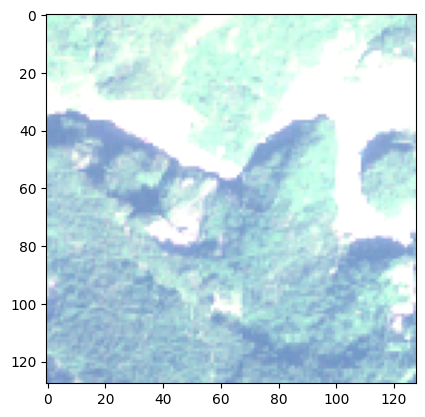

In [ ]:
plt.imshow(data[:, :, 3:0:-1])             #plotting sample image

In [ ]:
plt.imshow(data[:, :, 3], cmap = 'Reds')    #R of RGB

In [ ]:
plt.imshow(data[:, :, 2], cmap = 'Greens')  #G of RGB

In [ ]:
plt.imshow(data[:, :, 2], cmap = 'Blues')   #B of RGB

In [ ]:
with h5py.File(sample_path_mask) as f2:        #reading sample mask image
    keys = list(f2.keys())
    print("keys", keys)

    data = np.array(f2.get('mask'))

    print("input data shape:", data.shape)
    plt.imshow(data)                           #yellow marks where the landslide occurs 

###Part 3 - Defining train and validation datasets

In [ ]:
first_path = 'img/image_300.h5'
first_path_mask = 'mask/mask_300.h5'

training_path = 'img/*.h5'
training_path_mask = 'mask/*.h5'

In [ ]:
training_xx = np.zeros((3500, 128, 128, 3))        #initialising zero arrays for train images dataset
training_yy = np.zeros((3500, 128, 128, 1))        #initialising zero array for mask images dataset

all_train = sorted(glob.glob(training_path))
all_mask = sorted(glob.glob(training_path_mask))

In [ ]:
#building the training dataset

for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as f:
        keys = list(f.keys())
        data = np.array(f.get('img'))

        #assign 0 for the nan value
        data[np.isnan(data)] = 0.000001 
        
        #final array 
        training_xx[i, :, :, 0] = data[:, :, 3]         #red band
        training_xx[i, :, :, 1] = data[:, :, 2]         #green band
        training_xx[i, :, :, 2] = data[:, :, 1]         #blue band
        
   #mask train dataset
    with h5py.File(mask) as f:
        keys = list(f.keys())
        data = np.array(f.get('mask'))
        training_yy[i, :, :, 0] = data

0 img/image_1000.h5 mask/mask_1000.h5
1 img/image_1001.h5 mask/mask_1001.h5
2 img/image_1002.h5 mask/mask_1002.h5
3 img/image_1003.h5 mask/mask_1003.h5
4 img/image_1004.h5 mask/mask_1004.h5
5 img/image_1005.h5 mask/mask_1005.h5
6 img/image_1006.h5 mask/mask_1006.h5
7 img/image_1007.h5 mask/mask_1007.h5
8 img/image_1008.h5 mask/mask_1008.h5
9 img/image_1009.h5 mask/mask_1009.h5
10 img/image_1010.h5 mask/mask_1010.h5
11 img/image_1011.h5 mask/mask_1011.h5
12 img/image_1012.h5 mask/mask_1012.h5
13 img/image_1013.h5 mask/mask_1013.h5
14 img/image_1014.h5 mask/mask_1014.h5
15 img/image_1015.h5 mask/mask_1015.h5
16 img/image_1016.h5 mask/mask_1016.h5
17 img/image_1017.h5 mask/mask_1017.h5
18 img/image_1018.h5 mask/mask_1018.h5
19 img/image_1019.h5 mask/mask_1019.h5
20 img/image_1020.h5 mask/mask_1020.h5
21 img/image_1021.h5 mask/mask_1021.h5
22 img/image_1022.h5 mask/mask_1022.h5
23 img/image_1023.h5 mask/mask_1023.h5
24 img/image_1024.h5 mask/mask_1024.h5
25 img/image_1025.h5 mask/mask_1025

In [ ]:
#defining the validation test as a subset of training test

x_train, x_valid, y_train, y_valid = train_test_split(training_xx, training_yy, test_size = 0.2, shuffle = True)

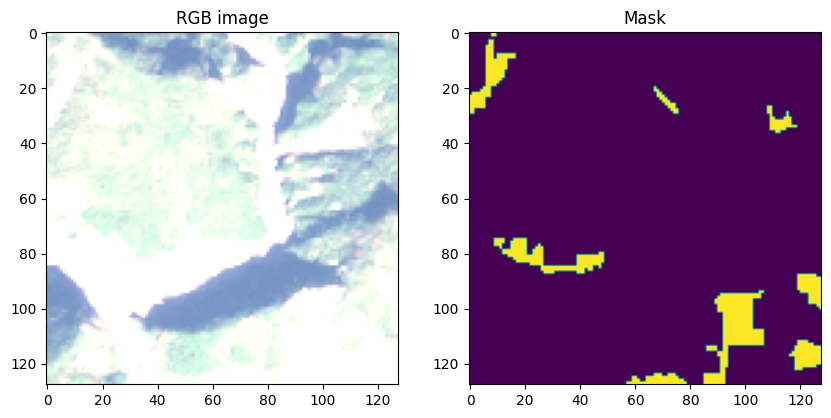

In [ ]:
img = 1

fig,(ax1, ax5) = plt.subplots(1,2,figsize=(10,10))

ax1.set_title("RGB image")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])

ax5.imshow(y_train[img, :, :, 0])

In [ ]:
#new training data shape

x_train.shape, y_train.shape

((2800, 128, 128, 3), (2800, 128, 128, 1))

In [ ]:
#validation data shape 

x_valid.shape, y_valid.shape

((700, 128, 128, 3), (700, 128, 128, 1))

In [ ]:
#releasing memory

del training_xx
del training_path
del all_train
del all_mask

###Part 4 - Building CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
#defining model as function

def LSM_model(img_width, img_height, img_channels): 

    #input layer                                                                           
    inputs = tf.keras.layers.Input((img_width, img_height, img_channels))   

    #begin contraction path

    #level 1
    #16 filters 
    #relu is activation function, for -ve numbers returns 0, +ve numbers remain as it is 
    #kernel initializer helps initialize the weights, he_normal is a truncated normal distribution centered at 0
    #padding as same insures the output size of the image is the same as the input size
    #stride remains default as 1 
    #drouput rate is 10%
    #(2,2) pooling is done to reduce size by half 
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    #level 2
    #32 filters
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    #level 3
    #64 filters 
    #dropout rate increases to 20%
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    #level 4
    #128 filters
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p3)
    c4 = tf.keras.layers.Dropout(0.3)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)


    #begin expansive path
    
    #level 5
    #64 filters
    #stride is 2
    #concatenate joins output of current layer with relevant previous layer
    #here we upsample i.e. increase the size of the output (pixels), for this Conv Transpose is used 
    #dropout is 20% 
    u5 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides = (2, 2), padding = 'same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c3])
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u5)
    c5 = tf.keras.layers.Dropout(0.2)(c5)
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c5)

    #level 6
    #32 filters
    u6 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides = (2, 2), padding = 'same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c2])
    c6 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u6)
    c6 = tf.keras.layers.Dropout(0.1)(c6)
    c6 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c6)

    #level 7
    #16 filters
    #dropout decreases to 10%
    u7 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides = (2, 2), padding = 'same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c1])
    c7 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u7)
    c7 = tf.keras.layers.Dropout(0.1)(c7)
    c7 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c7)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c7)

    model = tf.keras.Model(inputs = [inputs], outputs = [outputs])
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
                  metrics = ['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
    
    return model

In [ ]:
model = LSM_model(128, 128, 3)

checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", 
                                                  monitor = "val_recall", 
                                                  verbose = 1, 
                                                  save_best_only = True, 
                                                  mode = "max")

callbacks = [
    checkpointer
    ]

history = model.fit(x_train, y_train, 
                    batch_size = 16,  
                    epochs = 100, 
                    verbose = 1,
                    validation_data = (x_valid, y_valid),
                    callbacks = callbacks)

model.save("model_save.h5")

Epoch 1/100
175/175 [==============================] - ETA: 0s - loss: 0.1228 - accuracy: 0.9618 - recall_1: 0.0241 - precision_1: 0.0346
Epoch 1: val_recall_1 improved from -inf to 0.01453, saving model to best_model.h5
175/175 [==============================] - 16s 59ms/step - loss: 0.1228 - accuracy: 0.9618 - recall_1: 0.0241 - precision_1: 0.0346 - val_loss: 0.0684 - val_accuracy: 0.9764 - val_recall_1: 0.0145 - val_precision_1: 0.6171
Epoch 2/100
175/175 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 0.9768 - recall_1: 0.0123 - precision_1: 0.5116
Epoch 2: val_recall_1 did not improve from 0.01453
175/175 [==============================] - 8s 44ms/step - loss: 0.0647 - accuracy: 0.9768 - recall_1: 0.0123 - precision_1: 0.5116 - val_loss: 0.0602 - val_accuracy: 0.9764 - val_recall_1: 0.0067 - val_precision_1: 0.7188
Epoch 3/100
175/175 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9770 - recall_1: 0.0258 - precision_1: 0.5964
Epoch 3

In [ ]:
loss, accuracy, recall, precision = model.evaluate(x_valid, y_valid, verbose = 0)
print('loss =', loss, 
      'accuracy =', accuracy, 
      'precision =', precision, 
      'recall =', recall)

loss = 0.04344230517745018 accuracy = 0.9861894845962524 precision = 0.7622189521789551 recall = 0.6074604392051697


In [ ]:
f1_score = (2*precision*recall)/(precision+recall)
print('f1 score =', f1_score)

f1 score = 0.676096701715328


In [ ]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc = 'upper left')

ax12.plot(history.history['precision'])
ax12.plot(history.history['val_precision'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc = 'upper left')

ax13.plot(history.history['recall'])
ax13.plot(history.history['val_recall'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc = 'upper left')


In [ ]:
threshold = 0.4
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

22/22 [==============================] - 1s 20ms/step


In [ ]:
pred_img.shape

(700, 128, 128, 1)

###Validation data prediction

Text(0.5, 1.0, 'Training Image')

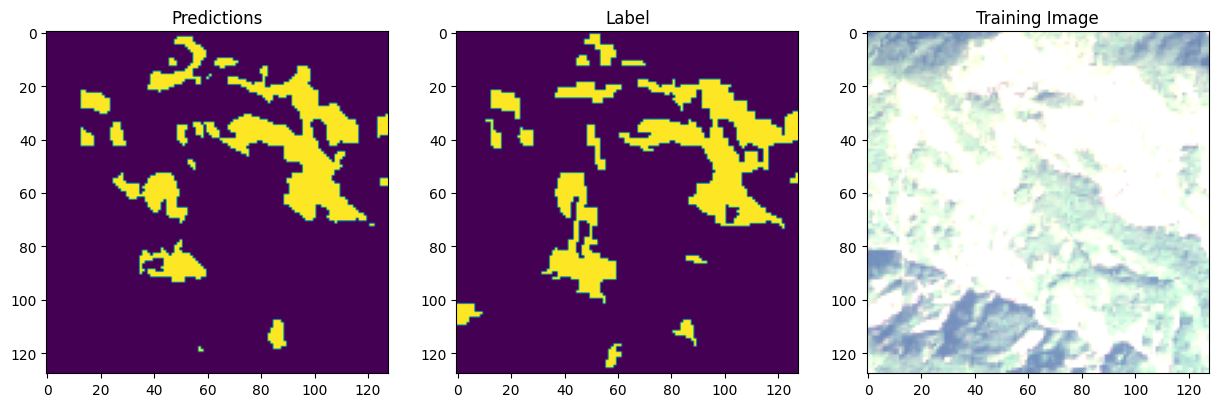

In [ ]:
img = 1
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

###Part - 5 Test data performance

In [ ]:
from PIL import Image
import cv2

In [ ]:
#reading image

im = cv2.imread(r'/content/gdrive/MyDrive/test data/DJI_0463.JPG', 1)
im.shape

(6000, 8000, 3)

In [ ]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [ ]:
#resizing image pixels

im = cv2.resize(im, (128, 128),
               interpolation = cv2.INTER_LINEAR)
im.shape

(128, 128, 3)

In [ ]:
im_new = np.zeros((128, 128, 3))

In [ ]:
im_new[:, :, 0] = im[:, :, 0]/255
im_new[:, :, 1] = im[:, :, 1]/255
im_new[:, :, 2] = im[:, :, 2]/255

In [ ]:
im_new

array([[[0.90980392, 0.98823529, 0.98039216],
        [0.90588235, 0.99215686, 0.98039216],
        [0.90588235, 0.99215686, 0.98039216],
        ...,
        [0.43529412, 0.7372549 , 0.95686275],
        [0.40392157, 0.72156863, 0.9372549 ],
        [0.39607843, 0.74509804, 0.96470588]],

       [[0.90588235, 0.99215686, 0.98039216],
        [0.90588235, 0.99215686, 0.98039216],
        [0.90588235, 0.99215686, 0.98039216],
        ...,
        [0.40784314, 0.72941176, 0.9372549 ],
        [0.41568627, 0.74117647, 0.95686275],
        [0.41960784, 0.74509804, 0.95686275]],

       [[0.91372549, 0.99215686, 0.98039216],
        [0.90588235, 0.99215686, 0.98039216],
        [0.90588235, 0.99215686, 0.98039216],
        ...,
        [0.4       , 0.72941176, 0.94117647],
        [0.42352941, 0.74117647, 0.94901961],
        [0.42352941, 0.75686275, 0.96862745]],

       ...,

       [[0.22745098, 0.24705882, 0.23137255],
        [0.04313725, 0.10196078, 0.12156863],
        [0.03529412, 0

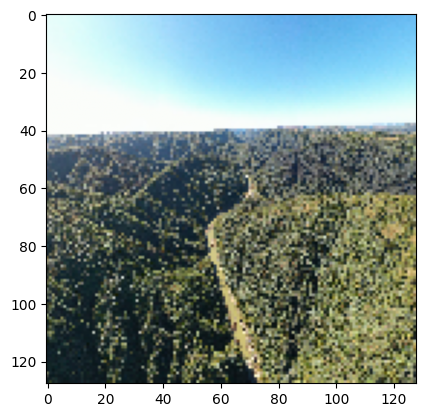

In [ ]:
plt.imshow(im_new)

In [ ]:
#resizing image to meet model requirements 

im_new.shape = ((1, 128, 128, 3))

In [ ]:
#prediction

threshold = 0.4
pred_img = model.predict(im_new)
pred_img = (pred_img > threshold).astype(np.uint8) 

1/1 [==============================] - 0s 23ms/step


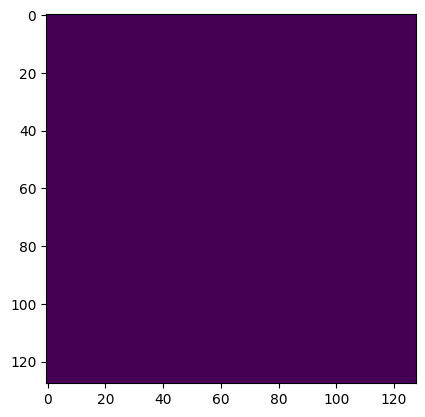

In [ ]:
pred_img.shape = (128, 128, 1)
plt.imshow(pred_img)